Found 11504 images belonging to 30 classes.
Found 1438 images belonging to 30 classes.
Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 527ms/step - accuracy: 0.6480 - loss: 1.5441 - val_accuracy: 0.9645 - val_loss: 0.1875
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2925 - val_accuracy: 0.9667 - val_loss: 0.1373
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 191s 528ms/step - accuracy: 0.9519 - loss: 0.2056 - val_accuracy: 0.9780 - val_loss: 0.0966
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1970 - val_accuracy: 1.0000 - val_loss: 0.0658
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 197s 543ms/step - accuracy: 0.9710 - loss: 0.1237 - val_accuracy: 0.9744 - val_loss: 0.0851
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 532ms/step - accuracy: 0.9823 - loss: 0.0835 - val_accuracy: 0.9837 - val_loss: 0.0556

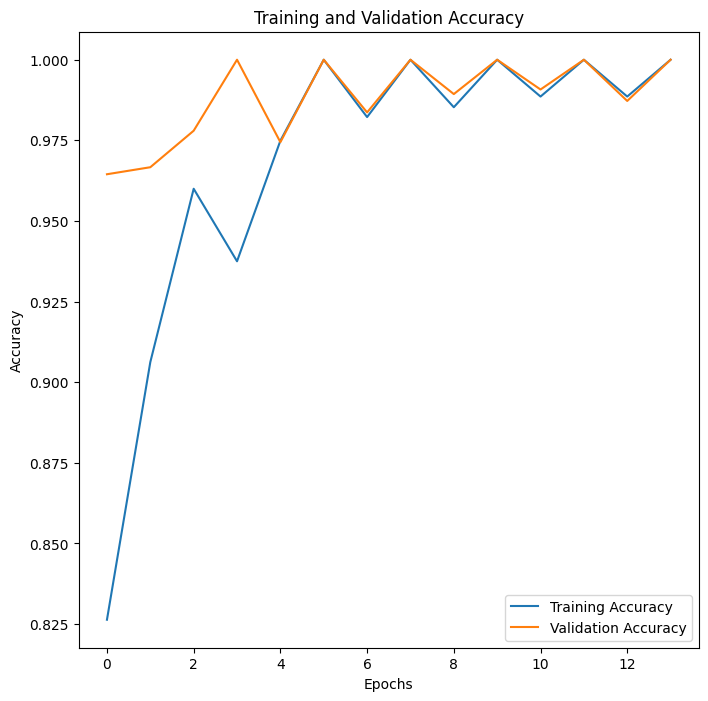

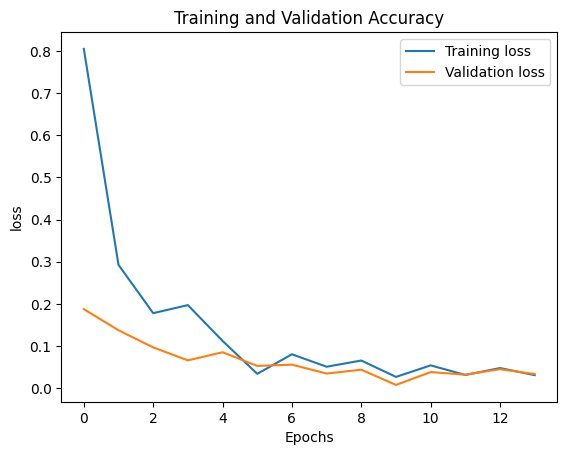

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import json


train_dir = 'train'
val_dir = 'val'


IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)


history.params
history.history.keys()
(history.history['accuracy'])

model.save('medicinal_plant_identification_model.keras')



class_indices = train_generator.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))




plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('training_validation_accuracy.png')
plt.show()



loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.savefig('training_validation_loss.png')
plt.show()


model = tf.keras.models.load_model('medicinal_plant_identification_model.keras')

with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
    class_labels = {v: k for k, v in class_indices.items()}



In [4]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // 32)
print(f"Validation Accuracy: {val_accuracy:.4f}")


# Evaluate the model on the validation set
loss, accuracy = model.evaluate(train_generator, steps=train_generator.samples // 32)
print(f"Accuracy: {accuracy:.4f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9796 - loss: 0.0963
Validation Accuracy: 0.9780
359/359 ━━━━━━━━━━━━━━━━━━━━ 180s 502ms/step - accuracy: 0.9735 - loss: 0.1233
Accuracy: 0.9718


In [3]:
# Load the saved model
model = tf.keras.models.load_model('medicinal_plant_identification_model.keras')

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator, steps=val_generator.samples // 32)
print(f"Validation Accuracy: {accuracy:.4f}")

NameError: name 'json' is not defined

Found 11504 images belonging to 30 classes.
Found 1438 images belonging to 30 classes.
Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 527ms/step - accuracy: 0.6480 - loss: 1.5441 - val_accuracy: 0.9645 - val_loss: 0.1875
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.2925 - val_accuracy: 0.9667 - val_loss: 0.1373
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 191s 528ms/step - accuracy: 0.9519 - loss: 0.2056 - val_accuracy: 0.9780 - val_loss: 0.0966
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1970 - val_accuracy: 1.0000 - val_loss: 0.0658
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 197s 543ms/step - accuracy: 0.9710 - loss: 0.1237 - val_accuracy: 0.9744 - val_loss: 0.0851
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 193s 532ms/step - accuracy: 0.9823 - loss: 0.0835 - val_accuracy: 0.9837 - val_loss: 0.0556

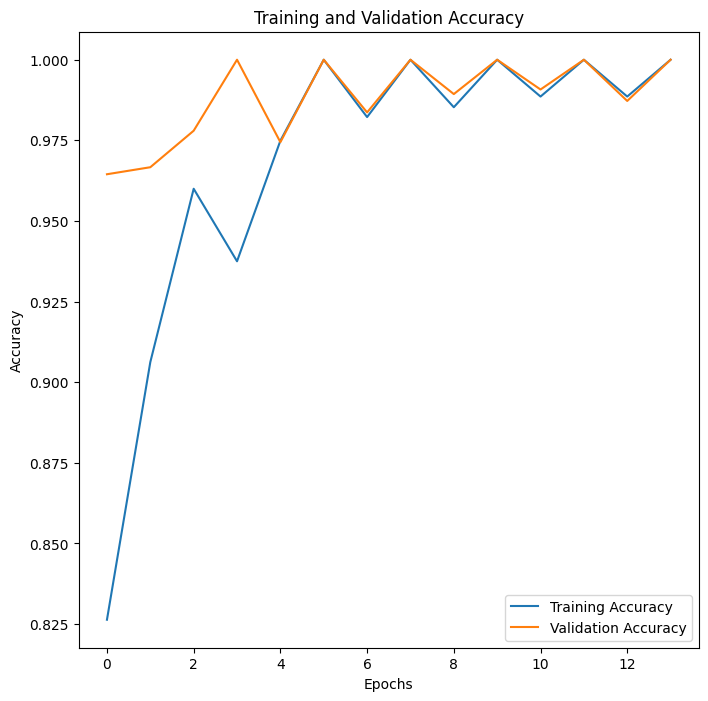

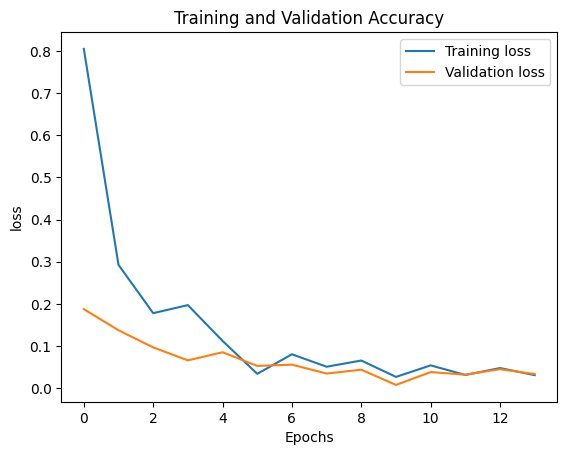

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import json


train_dir = 'train'
val_dir = 'val'


IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)


history.params
history.history.keys()
(history.history['accuracy'])

model.save('medicinal_plant_identification_model.keras')



class_indices = train_generator.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))




plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('training_validation_accuracy.png')
plt.show()



loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.savefig('training_validation_loss.png')
plt.show()


model = tf.keras.models.load_model('medicinal_plant_identification_model.keras')

with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
    class_labels = {v: k for k, v in class_indices.items()}



In [ ]:
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // 32)
print(f"Validation Accuracy: {val_accuracy:.4f}")


# Evaluate the model on the validation set
loss, accuracy = model.evaluate(train_generator, steps=train_generator.samples // 32)
print(f"Accuracy: {accuracy:.4f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.9796 - loss: 0.0963
Validation Accuracy: 0.9780
359/359 ━━━━━━━━━━━━━━━━━━━━ 180s 502ms/step - accuracy: 0.9735 - loss: 0.1233
Accuracy: 0.9718
